# Tracking Objects

- Color Based Thresholding

- Understanding HSV Color Model

###  What is Color-Based Thresholding?

- Imagine Colors as Numbers: Every color in a picture is made up of different numbers. These numbers represent the amounts of red, green, and blue in a color. It's like mixing paints to get different colors.

- Thresholding Magic: We set rules using these numbers to pick out just the colors we want. For example, we can say, "Hey computer, show me only the red things in this picture!"

- Think of thresholding as a way to pick out things based on their color, just like using a special filter to find your favorite candy in a bowl of different candies.

- Thresholding is like making the computer wear special glasses that only let it see the color you're interested in. It's like a magic trick that reveals only the colors you want, making it easier to find specific things in a picture based on their color.

- By setting rules about colors, thresholding helps us spot and highlight just the colors we're looking for.

### Understanding HSV Color Model

- HSV stands for Hue, Saturation, and Value.

- Hue: Imagine a color wheel, like the one artists use. Hue is like pointing to a color on that wheel. So, when we say "red" or "blue," we're talking about hue. It tells us what basic color something is.

- Saturation: This one's about how vibrant or dull a color is. Think about crayons. A fresh, bold crayon is highly saturated, but when you color a lot with it, it becomes lighter and less intense.

- Value: It's like saying how bright or dark a color is. For instance, a bright yellow is different from a darker, more mustardy yellow. Value helps us tell the difference.

### Simplified

- Hue is the basic color, like red, blue, or yellow.
- Saturation is how intense or faded the color appears.
- Value is how bright or dark the color looks.

### Example : Fruit Bowl

- Hue: Different fruits like orange, apple, or banana (basic color of each fruit)
- Saturation: How fresh or faded each fruit looks
- Value: How bright or dark the color of each fruit is

<hr>

## Tracking Blue Colored Ball in a Video

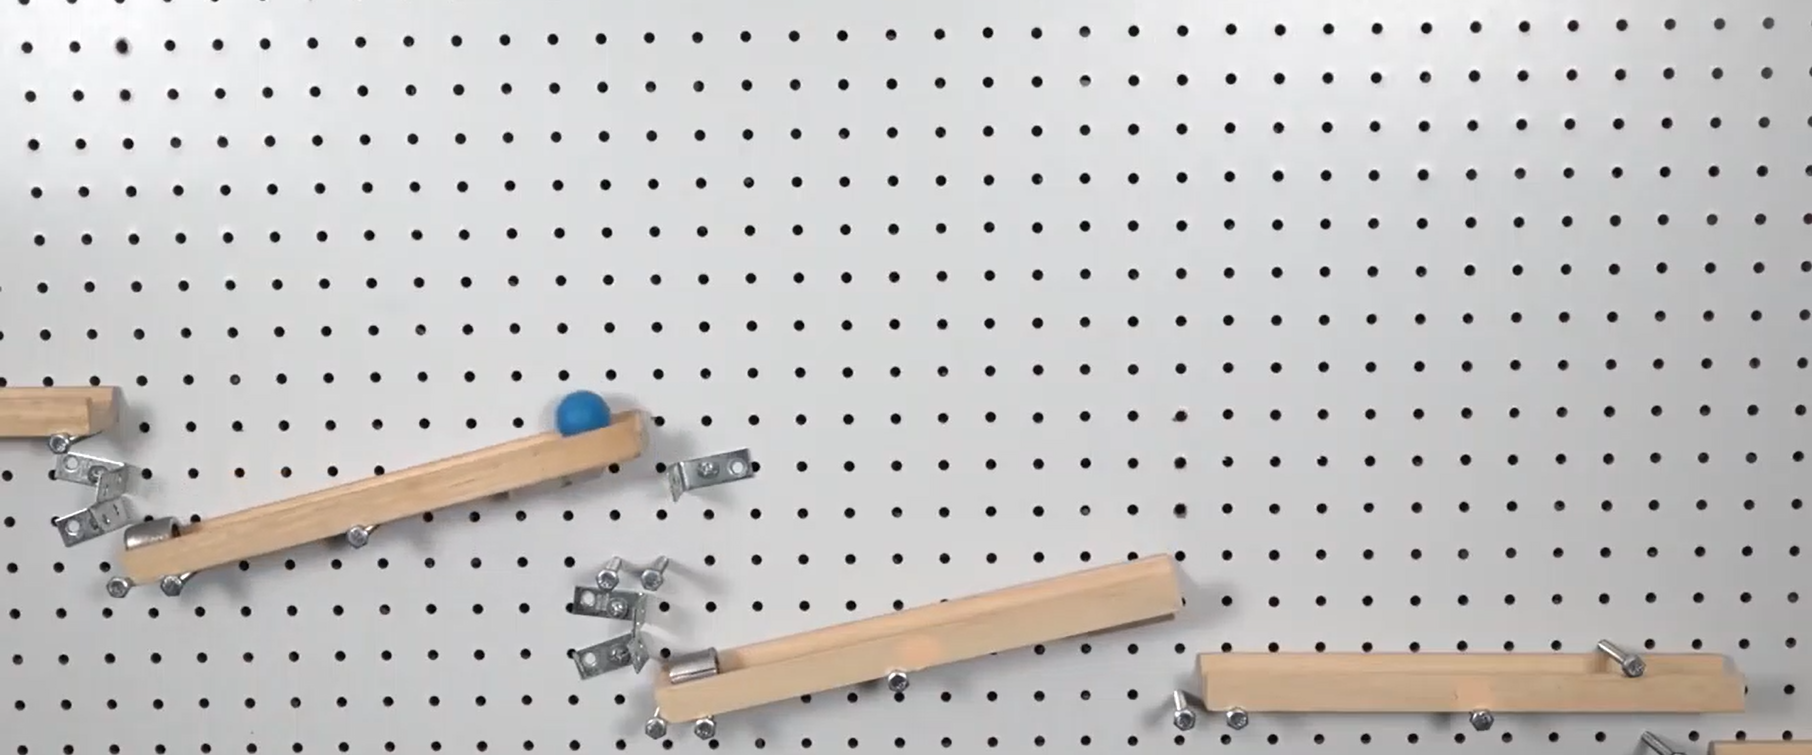

In [3]:
import cv2
import numpy as np

cap = cv2.VideoCapture("C:\\Users\\OMOLP094\\Desktop\\Research Projects\\School content\\School content\\IMAGE PROCESSING LEVEL 2\\Session 1\\videos\\blue_ball.mp4")

while(1):

    # Take each frame
    ret, frame = cap.read()

    if not ret:
        break
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([32,86,109])
    upper_blue = np.array([127,255,199])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
        

cv2.destroyAllWindows()

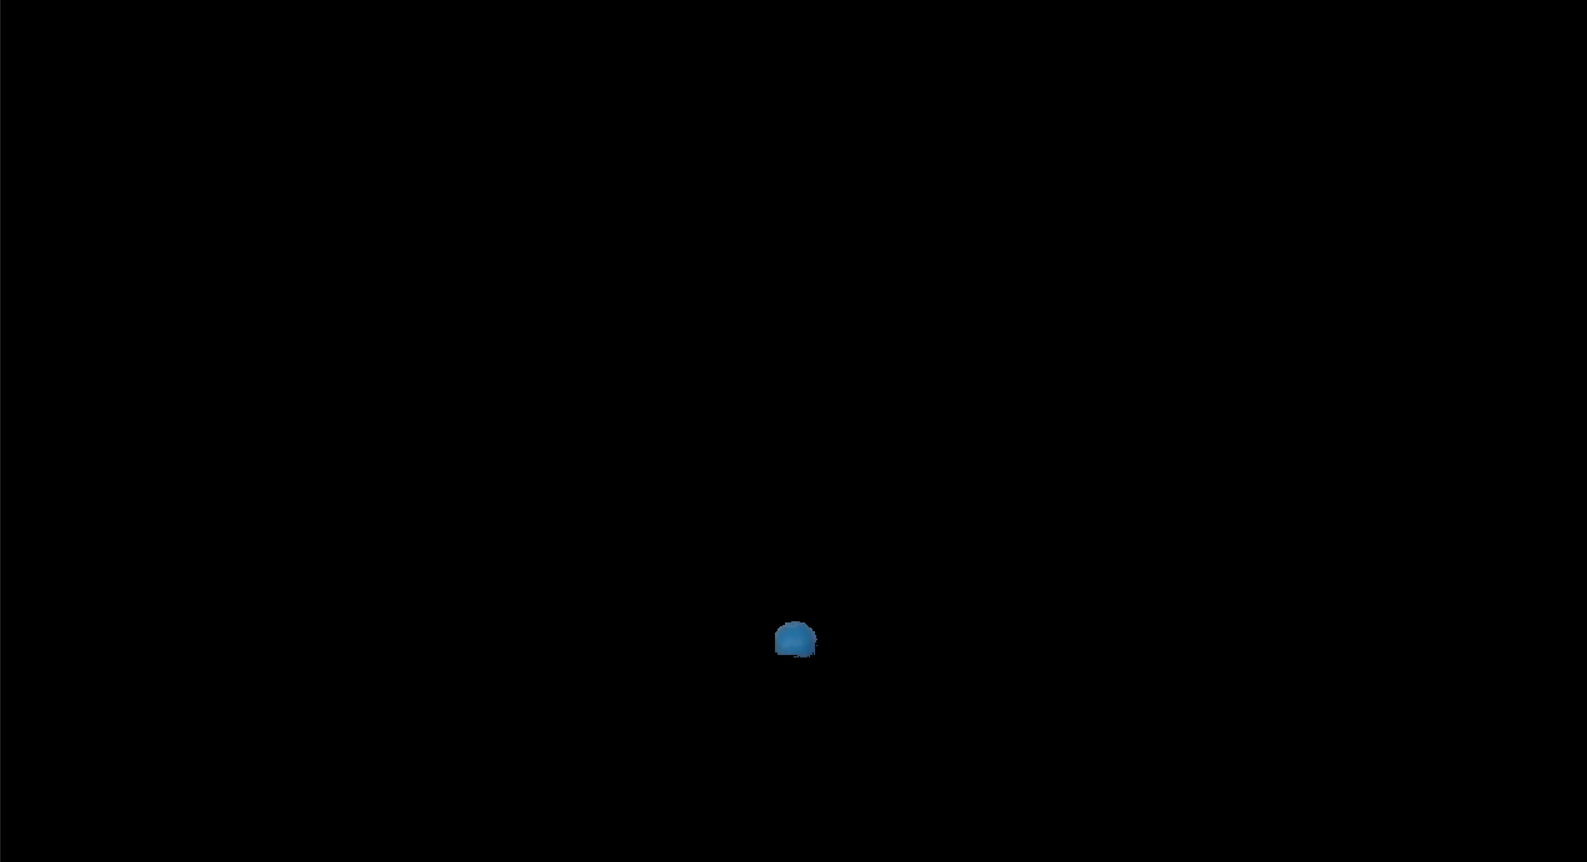

### Code Explanation : 

        This code essentially reads a video frame by frame, converts each frame to the HSV color space, creates a mask isolating a specific range of blue color, and displays the original frame along with the mask and the extracted blue regions in real-time until the user presses the 'Esc' key.

- The code uses OpenCV, a computer vision library in Python, to process a video file (blue_ball.mp4) containing a blue ball.

- It starts by importing necessary libraries - cv2 for OpenCV functionalities and numpy as np for numerical operations.

- cv2.VideoCapture initializes capturing the video file from the specified path.

- A while loop is set up to continuously read frames from the video until there are no more frames left (while(1):). This loop runs until it's manually broken by pressing the 'Esc' key (ASCII code 27).

- Inside the loop:

        cap.read() reads the next frame from the video.
        The code checks if a frame is successfully read (ret is True). If not, it breaks the loop, indicating the end of the video.
        The frame is converted from the BGR color space to the HSV color space using cv2.cvtColor.
        Two arrays lower_blue and upper_blue are defined to set the range of blue color in HSV format.

        cv2.inRange creates a binary mask where white pixels represent the blue color within the specified range, and black pixels represent everything else.

        cv2.bitwise_and performs a bitwise AND operation between the original frame and the mask to extract only the blue regions from the frame.

- Three windows are displayed using cv2.imshow:

        'frame' displays the original frame.
        'mask' shows the mask that isolates the blue color.
        'res' displays the result obtained after applying the mask to the original frame.
        cv2.waitKey(5) waits for a key event for 5 milliseconds. If the pressed key's ASCII value is 27 (the 'Esc' key), the loop breaks.

- Finally, cv2.destroyAllWindows() closes all OpenCV windows once the loop breaks.

<hr>

## Tracking Red, Green & Blue Colored Balls in a Video

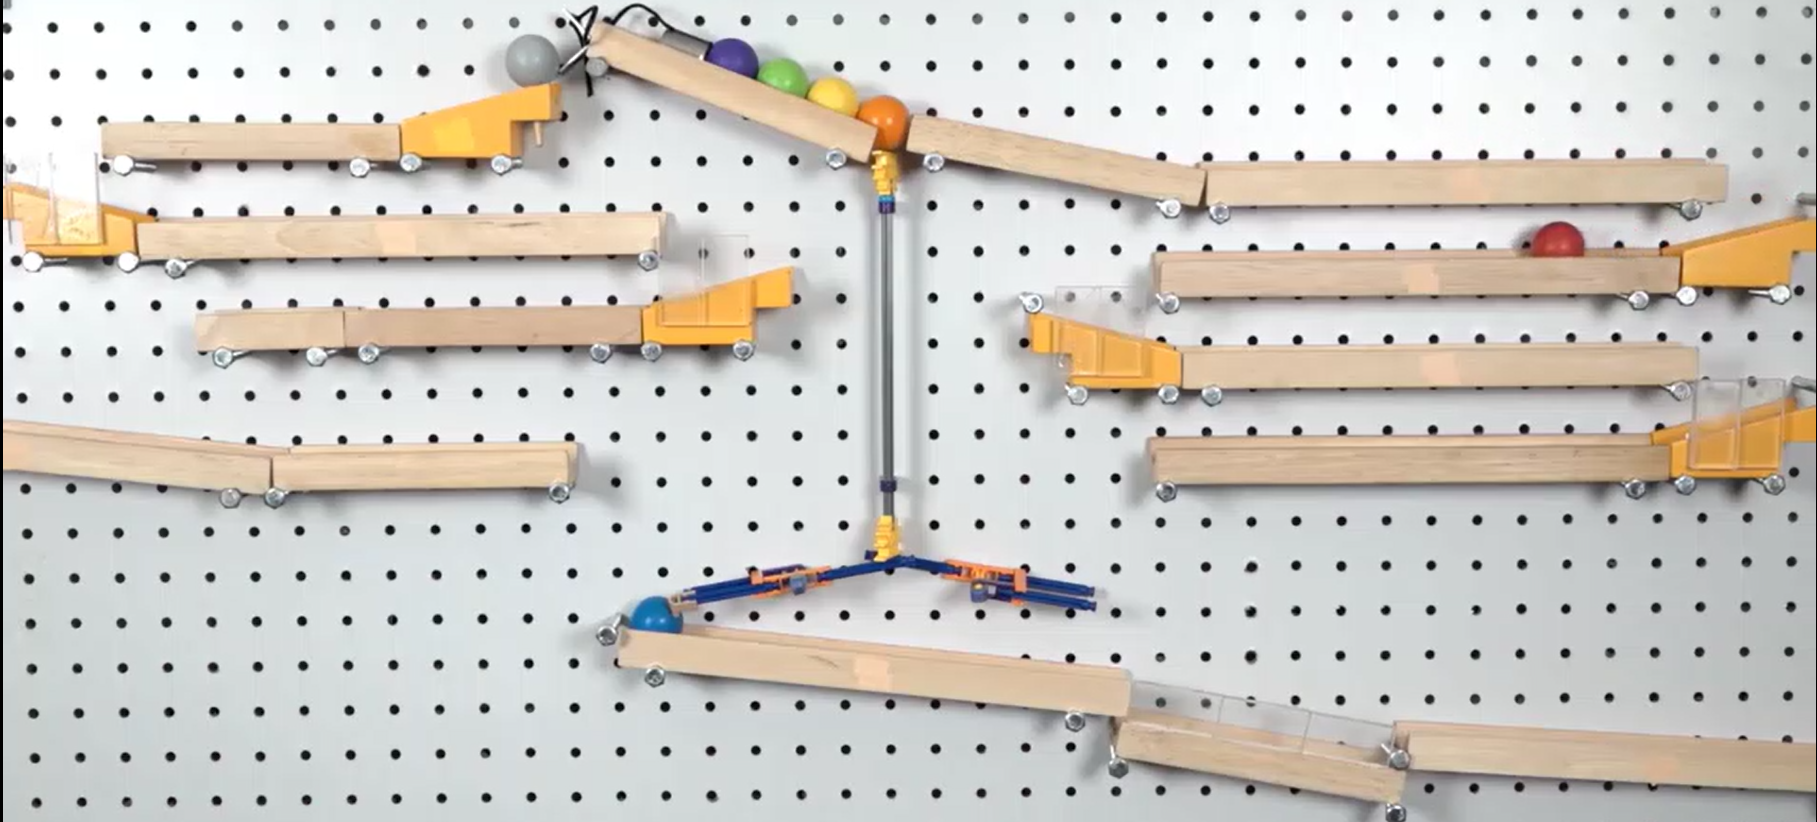

In [5]:
import cv2
import numpy as np

cap = cv2.VideoCapture("C:\\Users\\OMOLP094\\Desktop\\Research Projects\\School content\\School content\\IMAGE PROCESSING LEVEL 2\\Session 1\\videos\\all_ball.mp4")

# Define the adjusted ranges for blue, red, and green colors in HSV
blue_lower = np.array([100, 150, 50])
blue_upper = np.array([140, 255, 255])

red_lower1 = np.array([0, 100, 100])
red_upper1 = np.array([10, 255, 255])
red_lower2 = np.array([160, 100, 100])
red_upper2 = np.array([179, 255, 255])

green_lower = np.array([40, 100, 100])
green_upper = np.array([80, 255, 255])

while True:
    ret, frame = cap.read()

    if not ret:
        break

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Threshold the HSV image to get each color's mask
    mask_blue = cv2.inRange(hsv, blue_lower, blue_upper)
    mask_red1 = cv2.inRange(hsv, red_lower1, red_upper1)
    mask_red2 = cv2.inRange(hsv, red_lower2, red_upper2)
    mask_red = cv2.bitwise_or(mask_red1, mask_red2)
    mask_green = cv2.inRange(hsv, green_lower, green_upper)

    # Bitwise-AND masks with original frame to get colored regions
    blue_result = cv2.bitwise_and(frame, frame, mask=mask_blue)
    red_result = cv2.bitwise_and(frame, frame, mask=mask_red)
    green_result = cv2.bitwise_and(frame, frame, mask=mask_green)

    # Combine all results into a single image
    combined_result = cv2.addWeighted(blue_result, 1, red_result, 1, 0)
    combined_result = cv2.addWeighted(combined_result, 1, green_result, 1, 0)

    cv2.imshow('Combined Tracking', combined_result)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()


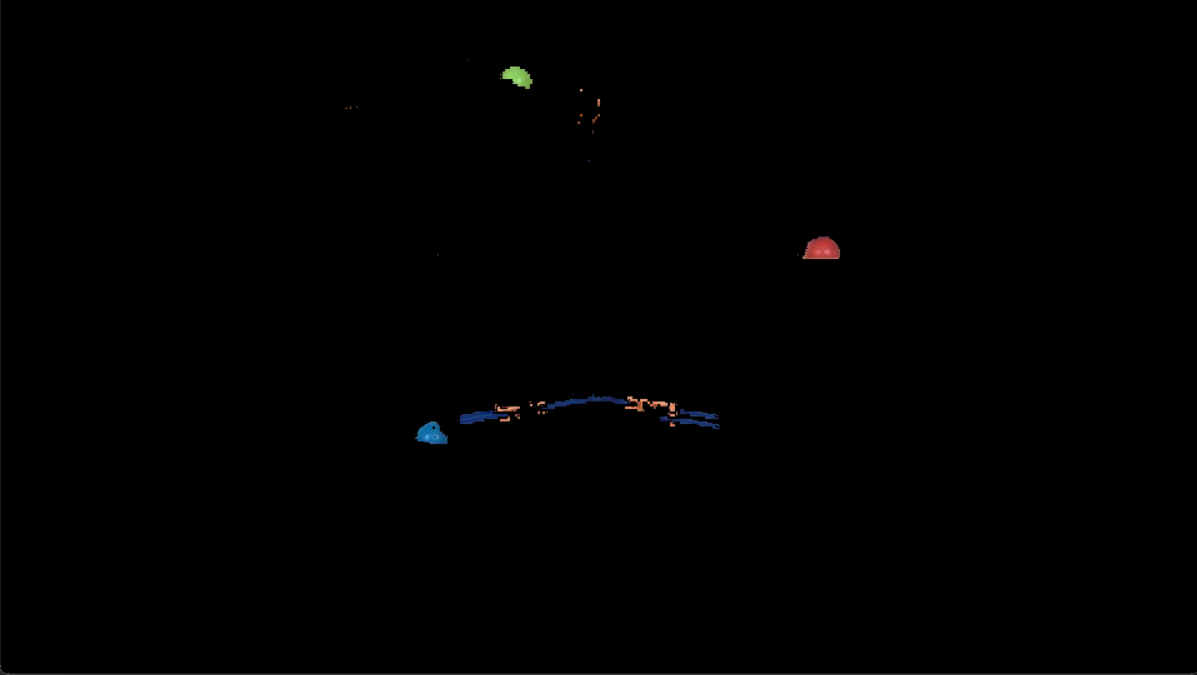

### Code Explanation : 

    This code reads a video frame by frame, isolates regions of blue, red (accounting for the red hue's distribution), and green colors in each frame using HSV color thresholding, and finally combines these color regions into a single image for visualization.

- Libraries cv2 and numpy are imported. cv2 is used for computer vision functionalities, while numpy is utilized for numerical operations.

- The code captures a video file named all_ball.mp4 located at the specified path using cv2.VideoCapture.

- HSV color range values are defined for blue, red, and green colors:

        blue_lower and blue_upper define the HSV range for blue color.
        red_lower1, red_upper1, red_lower2, and red_upper2 define two HSV ranges for red, considering the color's hue wrapping around the color wheel (values near 0 and 179).
        green_lower and green_upper define the HSV range for green color.
        A while loop runs continuously to process each frame of the video until there are no more frames left.

- Inside the loop:

        cap.read() reads the next frame from the video.
        The code checks if a frame is successfully read (ret is True). If not, it breaks the loop, indicating the end of the video.
        Each frame is converted from the BGR color space to the HSV color space using cv2.cvtColor.

        Masks are created for each color by thresholding the HSV image using cv2.inRange based on the defined HSV color ranges.

        For the red color, two masks (mask_red1 and mask_red2) are created due to the red hue's split across the color spectrum. These masks are combined using cv2.bitwise_or to create a single mask for red color detection.

        cv2.bitwise_and is applied to each color's mask and the original frame to extract the colored regions for blue, red, and green.

        The extracted color regions are combined using cv2.addWeighted to obtain a single image (combined_result) containing blue, red, and green regions.

        The resulting combined image is displayed in a window named 'Combined Tracking' using cv2.imshow.

        The code waits for a key press with cv2.waitKey. If the pressed key's ASCII value is 27 (the 'Esc' key), the loop breaks, and all OpenCV windows are closed using cv2.destroyAllWindows.

<hr>
<hr>